## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import seaborn as sns

import pycountry_convert as pc

Load data file in dataframe.

In [3]:
df=pd.read_csv('Data/wb_gender_data_cleaned.csv')

Confirm layout of data, 82 countries with 163 features.

In [4]:
df.shape

(82, 163)

Checking a summary of our target variable. The majority of countries have between 28% and 39% of female share of employment in senior and middle management.

In [24]:
df['Female share of employment in senior and middle management (%)'].describe().round(decimals=2).T

count    82.00
mean     32.60
std      10.12
min       6.33
25%      28.09
50%      32.85
75%      39.16
max      61.96
Name: Female share of employment in senior and middle management (%), dtype: float64

Creating a histogram plot showing the distribution of the target variable.  

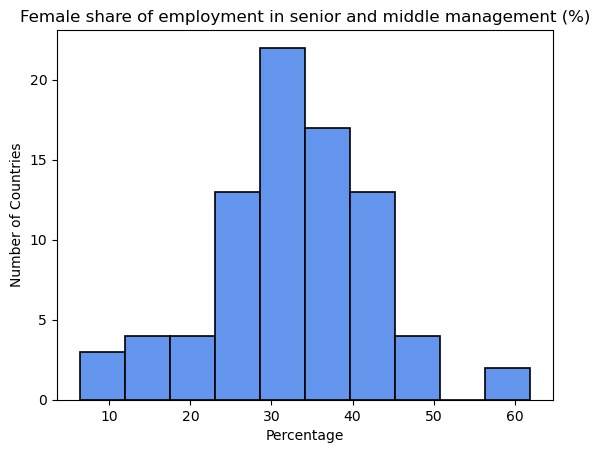

In [7]:
pl.hist(df['Female share of employment in senior and middle management (%)'],bins=10,color='cornflowerblue',edgecolor='black', linewidth=1.2)
pl.xlabel('Percentage')
pl.ylabel('Number of Countries')
pl.title('Female share of employment in senior and middle management (%)',loc='center')
pl.savefig('Plots/Target_hist.pdf')

In [25]:
df['Female share of employment in senior and middle management (%)'].value_counts(bins=10).head(10)

(28.578, 34.141]               22
(34.141, 39.704]               17
(23.015, 28.578]               13
(39.704, 45.267]               13
(11.889, 17.452]                4
(17.452, 23.015]                4
(45.267, 50.83]                 4
(6.268999999999999, 11.889]     3
(56.393, 61.956]                2
(50.83, 56.393]                 0
Name: Female share of employment in senior and middle management (%), dtype: int64

Creating a plot between the target and GDP per capita. This is interesting as it shows the countries with the highest numbers in the of females in these roles have low GDP per capita, which is not what I expected or may be assumed. 

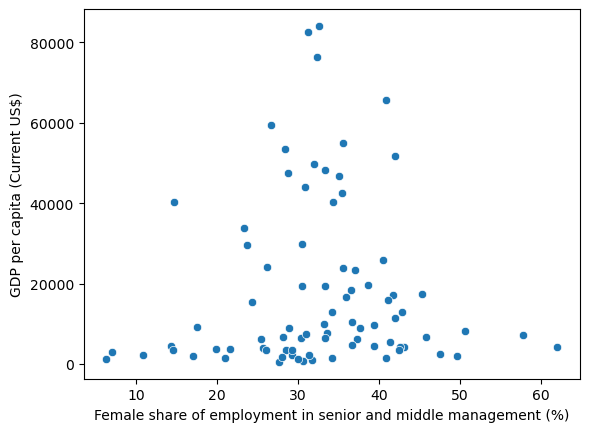

In [6]:
sns.scatterplot(data=df,
                x='Female share of employment in senior and middle management (%)',
                y='GDP per capita (Current US$)'
                )
# for idx, row in df.iterrows():
#     pl.text(row['Female share of employment in senior and middle management (%)'], row['GDP per capita (Current US$)'],row['Country Name'] )
pl.savefig('Plots/Target_GDP.pdf')


Creating a plot between the target and life expectancy at birth. Again, interestingly, countries with higher amounts of females within these roles, don't have particulary high life expectancy. This goes against the stereotype that richer, healthy countries have better gender equality.

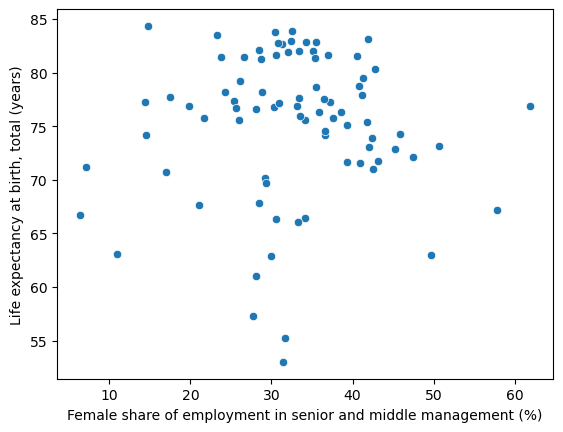

In [7]:
sns.scatterplot(data=df,
                x='Female share of employment in senior and middle management (%)',
                y='Life expectancy at birth, total (years)'
                )
# for idx, row in df.iterrows():
#     pl.text(row['Female share of employment in senior and middle management (%)'], row['Life expectancy at birth, total (years)'],row['Country Name'] )
pl.savefig('Plots/Target_LifeExp.pdf')

I next created a list of correlations between the target variable and all the other features.

In [28]:
corr_list = df.drop(['Country Name','Female share of employment in senior and middle management (%)'],axis=1).corrwith(df['Female share of employment in senior and middle management (%)'])

This shows that none of the features have very strong positive or negative correlation with the target. Having strongly correlated features is not helpful when running machine learning models as it causes them to overfit.

In [30]:
corr_list.sort_values(ascending=False).head(20)

A woman can work in an industrial job in the same way as a man (1=yes; 0=no)                    0.325206
A woman can work at night in the same way as a man (1=yes; 0=no)                                0.311185
Ratio of female to male labor force participation rate (%) (national estimate)                  0.279001
Labor force participation rate, female (% of female population ages 15+) (national estimate)    0.278361
A woman has the same rights to remarry as a man (1=yes; 0=no)                                   0.275988
Employment to population ratio, 15+, female (%) (national estimate)                             0.264311
Labor force participation rate, total (% of total population ages 15+) (national estimate)      0.240797
The law provides for the valuation of nonmonetary contributions (1=yes; 0=no)                   0.228744
Employment to population ratio, 15+, total (%) (national estimate)                              0.214033
Male and female surviving spouses have equal rights to 

In [31]:
corr_list.sort_values(ascending=False).tail(20)

Population ages 05-09, female                                            -0.264910
Age population, age 05, male, interpolated                               -0.267179
Age population, age 03, male, interpolated                               -0.268602
Age population, age 04, male, interpolated                               -0.268949
Population ages 00-04, male                                              -0.269840
Age population, age 02, male, interpolated                               -0.269849
Age population, age 05, female, interpolated                             -0.269922
Age population, age 0, male, interpolated                                -0.270134
Age population, age 01, male, interpolated                               -0.270482
Age population, age 03, female, interpolated                             -0.271082
Age population, age 0, female, interpolated                              -0.271454
Age population, age 04, female, interpolated                             -0.271567
Popu